In [33]:
import pandas as pd
import numpy as np
import time

# Data exploration

Before deciding on how to do feature engineering, we need to explore the data, the distributions of the data and the data types.

In [34]:
path = r"https://raw.githubusercontent.com/jordiferrero/grid-uk-ml/DataCollection/data/df_clean.csv"
grid_data = pd.read_csv(path)

In [35]:
grid_data.sample()

,Datetime,national_demand,pump_demand,demand_forecast,demand_outturn,demand_forecast_publishdate,f01,f02,f03,f04,...,storage_perc,wind_perc,total_wind_power,wind_forecast_publishdate,wind_forecast,temperature_deg,cloudcover_perc,windspeed_kmh,winddirection_degr,import_export_electricity
1790,2021-12-08 07:30:00,36968,7,36604,34840,2021-12-07T08:45:00,0.043897,0.00005,0.000018,0.000011,...,0.1,33.8,9965.908,2021-12-07T07:19:25,11239.0,5.3,86,18.9,149.0,1508


In [36]:
# How many % of nan values in dataset
grid_data.isnull().mean()

Datetime                       0.000000
national_demand                0.000000
pump_demand                    0.000000
demand_forecast                0.000000
demand_outturn                 0.000000
demand_forecast_publishdate    0.000000
f01                            0.000000
f02                            0.000000
f03                            0.000000
f04                            0.000000
f05                            0.000000
biomass_perc                   0.000000
carbon_intensity               0.000000
fossil_perc                    0.000000
generation                     0.000000
hydro_perc                     0.000000
imports_perc                   0.000000
nuclear_perc                   0.000000
other_perc                     0.000000
solar_perc                     0.000000
storage_perc                   0.000000
wind_perc                      0.000000
total_wind_power               0.000000
wind_forecast_publishdate      0.000000
wind_forecast                  0.000000


In [37]:
grid_data['temperature_k'] = grid_data['temperature_deg'] + 273
grid_data.pop('temperature_deg')
grid_data.describe().min()

national_demand              6415.857551
pump_demand                     0.000000
demand_forecast              6444.978726
demand_outturn               6387.764175
f01                             0.000000
f02                             0.000000
f03                             0.000000
f04                             0.000000
f05                             0.000000
biomass_perc                    0.000000
carbon_intensity               39.000000
fossil_perc                     5.300000
generation                   5864.755032
hydro_perc                      0.000000
imports_perc                    0.000000
nuclear_perc                    3.421049
other_perc                      0.000000
solar_perc                      0.000000
storage_perc                    0.000000
wind_perc                       1.000000
total_wind_power              132.346000
wind_forecast                 233.000000
cloudcover_perc                 0.000000
windspeed_kmh                   0.000000
winddirection_de

In [38]:
# Convert date columns into datetime 
date_time_cols = ['Datetime', 'demand_forecast_publishdate', 'wind_forecast_publishdate',]
for col in date_time_cols:
  grid_data[col] = pd.to_datetime(grid_data[col])

# numerical_columns = grid_data.columns.difference(date_time_cols)

In [39]:
grid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16027 entries, 0 to 16026
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Datetime                     16027 non-null  datetime64[ns]
 1   national_demand              16027 non-null  int64         
 2   pump_demand                  16027 non-null  int64         
 3   demand_forecast              16027 non-null  int64         
 4   demand_outturn               16027 non-null  int64         
 5   demand_forecast_publishdate  16027 non-null  datetime64[ns]
 6   f01                          16027 non-null  float64       
 7   f02                          16027 non-null  float64       
 8   f03                          16027 non-null  float64       
 9   f04                          16027 non-null  float64       
 10  f05                          16027 non-null  float64       
 11  biomass_perc                 16027 non-nu

## Trying out the effect of rebinning quantitative data

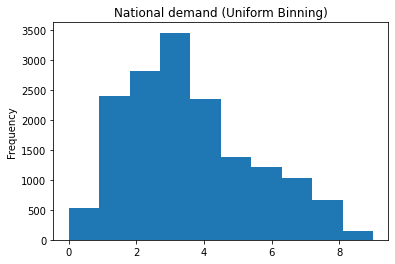

In [40]:
# Feature creation (from exisiting variable)

# 1. Create bins for continuous variable

from sklearn.preprocessing import KBinsDiscretizer
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') 
binned_data = binner.fit_transform(grid_data[['national_demand']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='National demand (Uniform Binning)', kind='hist', xlabel='national_demand'
)

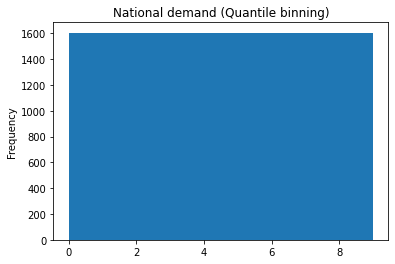

In [41]:
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned_data = binner.fit_transform(grid_data[['national_demand']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='National demand (Quantile binning)', kind='hist', xlabel='national_demand',
)

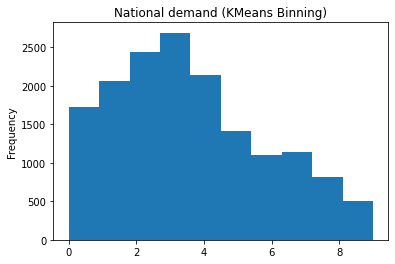

In [42]:
binner = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans') 
binned_data = binner.fit_transform(grid_data[['national_demand']].dropna())
pd.Series(binned_data.reshape(-1,)).plot(
    title='National demand (KMeans Binning)', kind='hist', xlabel='national_demand'
)

## Trying out the effect of renormalisation of the distributions of quantitative variables

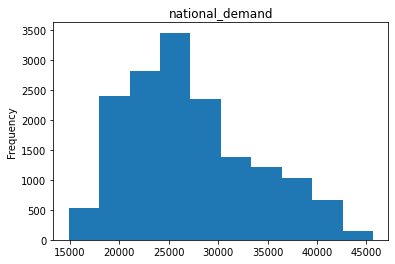

In [43]:
# Normalising quantitaive datasets (from N to M down to 0 to 1)
grid_data['national_demand'].plot(title='national_demand', kind='hist', xlabel='au')

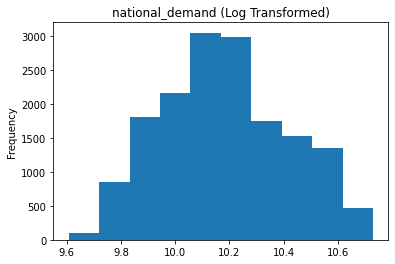

In [44]:
grid_data['national_demand'].map(np.log1p).plot(title='national_demand (Log Transformed)', kind='hist', xlabel='au')

In [45]:
# Get the min for each parameter
grid_data.describe()

,national_demand,pump_demand,demand_forecast,demand_outturn,f01,f02,f03,f04,f05,biomass_perc,...,solar_perc,storage_perc,wind_perc,total_wind_power,wind_forecast,cloudcover_perc,windspeed_kmh,winddirection_degr,import_export_electricity,temperature_k
count,16027.000000,16027.000000,16027.000000,16027.000000,16027.000000,16027.000000,16027.000000,16027.000000,16027.000000,16027.000000,...,16027.000000,16027.000000,16027.000000,16027.000000,16027.000000,16027.000000,16027.000000,16025.000000,16027.000000,16027.000000
mean,27170.686092,230.988457,27170.603669,27130.524303,0.027560,0.000023,0.000007,0.000005,0.000004,5.784339,...,4.181325,0.576352,25.016054,5733.121044,5735.508143,66.407250,23.062888,200.549017,-34.507643,283.249473
std,6415.857551,419.052633,6444.978726,6387.764175,0.017656,0.000020,0.000010,0.000009,0.000010,2.062269,...,6.364818,1.066409,14.827770,3647.971864,3874.624968,34.183357,11.573835,86.837590,2929.819554,5.460614
min,14879.000000,0.000000,14240.000000,15080.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,132.346000,233.000000,0.000000,0.000000,1.000000,-6362.000000,269.700000
25%,22326.000000,6.000000,22287.000000,22302.500000,0.014746,0.000010,0.000003,0.000002,0.000001,4.400000,...,0.000000,0.000000,12.650000,2549.051000,2365.000000,38.000000,14.500000,162.000000,-2522.500000,279.200000
50%,26119.000000,10.000000,26074.000000,26103.000000,0.023562,0.000016,0.000004,0.000003,0.000002,5.900000,...,0.000000,0.000000,22.500000,5067.602000,4946.000000,77.000000,21.800000,213.000000,194.000000,283.100000
75%,31139.000000,264.500000,31091.500000,31084.500000,0.035940,0.000029,0.000009,0.000005,0.000005,7.200000,...,6.900000,0.600000,37.000000,8876.795000,8807.000000,100.000000,30.600000,252.000000,2294.000000,287.300000
max,45679.000000,1655.000000,46760.000000,45591.000000,0.178960,0.000269,0.000228,0.000234,0.000238,12.200000,...,30.400000,6.300000,64.900000,14135.430000,14115.000000,100.000000,85.500000,360.000000,5906.000000,305.700000


# Feature engineering
## Create the Y (to predict) variable

It will be a BOOL on whether the import_export_electricity value will be positive or negative within t + 2h, given:

- All the % of current generation types
- Total generation value
- National demand
- Time of the day
- Quarter of the year
- Day of the week


Below, need to create:
- A column called `deficit_import_export_in_2h` that is 0 if net production is positive (export > import, -ve flow) or 1 if deficit in production (import > export, +ve flow).
This is extracted from [FLOW data](https://https://data.nationalgrideso.com/demand/historic-demand-data/r/historic_demand_data_2019), where -ve signifies export power out from GB and +ve signifies import power into GB.

In [46]:
# Create time columns metrics

grid_data['datetime_quarter'] = grid_data['Datetime'].dt.quarter
grid_data['datetime_day_of_week'] = grid_data['Datetime'].dt.dayofweek
grid_data['datetime_time_of_day'] = grid_data['Datetime'].dt.time.apply(lambda t: t.hour * 3600 + t.minute * 60 + t.second)

In [48]:
# Create the Y predictor (wheter imports are larger than exports) for current time

grid_data['deficit_import_export'] = grid_data['import_export_electricity'] > 0
grid_data['deficit_import_export']

0        True
1        True
2        True
3        True
4        True
         ... 
16022    True
16023    True
16024    True
16025    True
16026    True
Name: deficit_import_export, Length: 16027, dtype: bool

In [50]:
# Create the Y predictor (wheter imports are larger than exports) within 2 hours

temp_df = grid_data.set_index('Datetime')
temp_df['deficit_import_export_in_2h'] = temp_df['deficit_import_export'].shift(freq='2h')
#temp_df['deficit_import_export_in_2h'], temp_df['deficit_import_export']

grid_data['deficit_import_export_in_2h'] = temp_df['deficit_import_export_in_2h'].values
del temp_df
import gc
gc.collect()

grid_data['deficit_import_export_in_2h']

0          NaN
1          NaN
2          NaN
3          NaN
4         True
         ...  
16022    False
16023    False
16024    False
16025     True
16026     True
Name: deficit_import_export_in_2h, Length: 16027, dtype: object

In [51]:
# Set features of interest

columns_of_interest = [
    "deficit_import_export_in_2h",
    "national_demand",
    "generation",
    "fossil_perc",
    "nuclear_perc",
    "biomass_perc",
    "wind_perc",    
    "solar_perc",
    "hydro_perc",
    "storage_perc",
    "imports_perc",
    "other_perc",
    "datetime_quarter",
    "datetime_day_of_week",
    "datetime_time_of_day",
]

In [52]:
grid_subdata = grid_data[columns_of_interest].dropna().reset_index(drop=True)
grid_subdata["deficit_import_export_in_2h"] = grid_subdata["deficit_import_export_in_2h"].astype(int)
grid_subdata

,deficit_import_export_in_2h,national_demand,generation,fossil_perc,nuclear_perc,biomass_perc,wind_perc,solar_perc,hydro_perc,storage_perc,imports_perc,other_perc,datetime_quarter,datetime_day_of_week,datetime_time_of_day
0,1,18909,24235.0,11.2,23.1,4.7,55.4,0.0,2.1,0.0,3.0,0.5,4,0,9000
1,1,18710,25142.0,15.2,22.3,4.8,54.8,0.0,2.1,0.0,0.3,0.6,4,0,10800
2,1,18399,24990.0,14.2,22.4,4.5,55.6,0.0,2.1,0.0,0.6,0.6,4,0,12600
3,1,18345,25482.0,15.8,22.0,4.3,55.3,0.0,2.0,0.0,0.0,0.6,4,0,14400
4,1,18574,25801.0,15.9,21.7,4.3,55.5,0.0,2.0,0.0,0.0,0.5,4,0,16200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16014,0,25776,30995.0,26.8,14.1,3.0,48.2,0.0,1.0,0.0,6.6,0.3,3,4,77400
16015,0,24605,28498.0,24.7,15.3,2.5,50.7,0.0,0.9,0.0,5.6,0.4,3,4,79200
16016,0,23211,26937.0,21.9,16.2,2.7,52.1,0.0,0.9,0.0,6.0,0.3,3,4,81000
16017,1,21545,25974.0,19.4,16.8,2.8,53.7,0.0,0.9,0.0,6.0,0.4,3,4,82800


### Renormalisation of the new clean features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9988865850>,
      dtype=object)

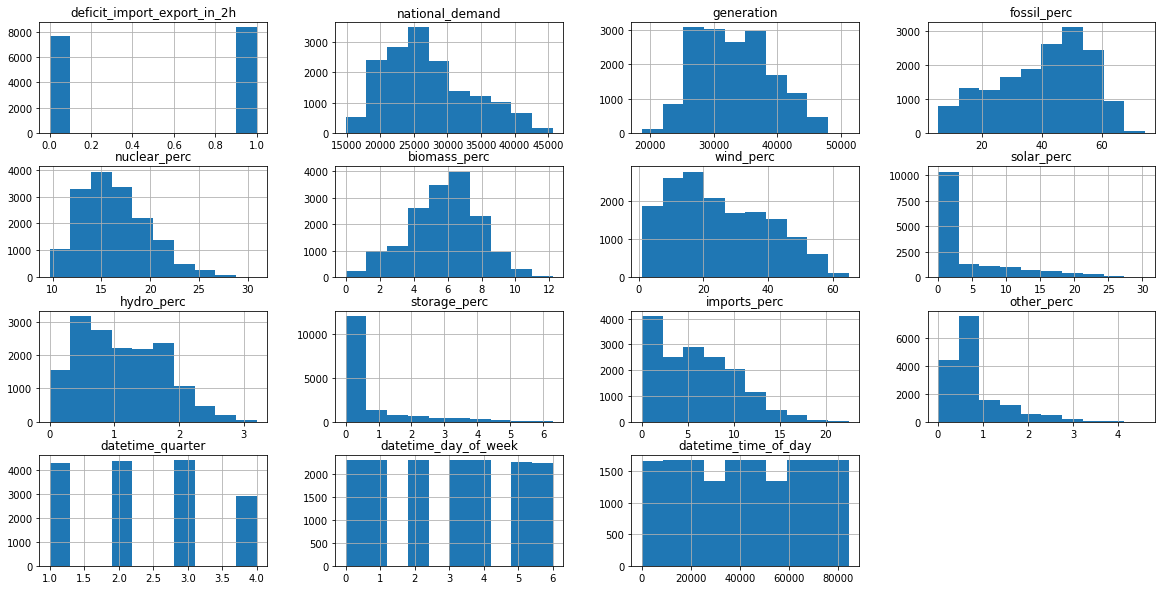

In [53]:
pd.DataFrame(grid_subdata).hist(figsize=(20, 10))

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f998819cb50>,
      dtype=object)

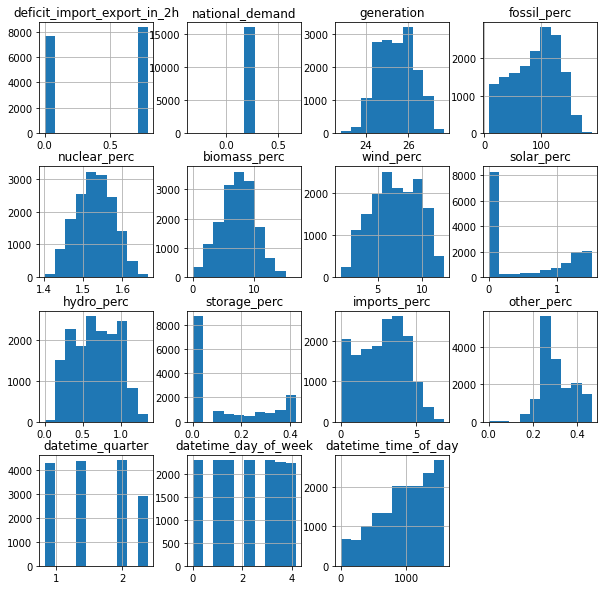

In [54]:
# Fails because 0 is not positive. Need to shift all col.min() == 0 to not be zero

from sklearn.preprocessing import PowerTransformer
boxcox_transformer = PowerTransformer(method='yeo-johnson', standardize=False)

pd.DataFrame(
    boxcox_transformer.fit_transform(grid_subdata),
    columns = grid_subdata.columns,
).hist(figsize=(10,10))

In [55]:
boxcox_transformer.lambdas_

array([ 0.34996143, -5.80973112,  0.15234095,  1.27064387, -0.49069781,
        1.17397268,  0.45188196, -0.56542994, -0.07495398, -2.33872251,
        0.44009815, -2.07591578,  0.46604825,  0.70527235,  0.60509532])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9987cb4f10>,
      dtype=object)

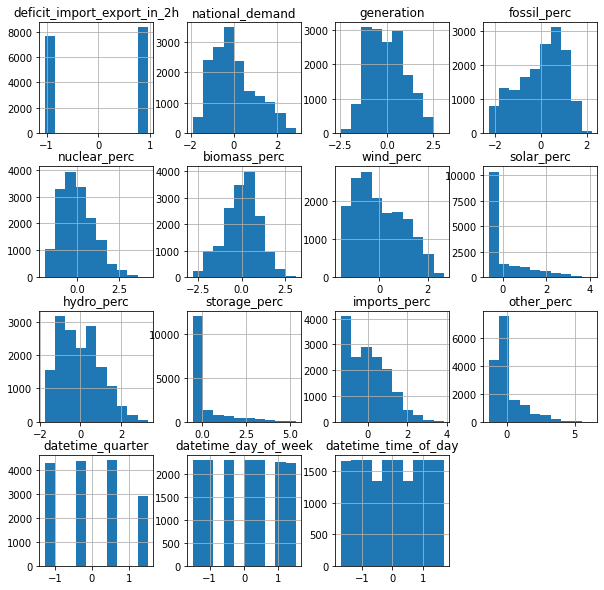

In [56]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pd.DataFrame(StandardScaler().fit_transform(grid_subdata), columns=grid_subdata.columns
    ).hist(figsize=(10,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9987731d60>,
      dtype=object)

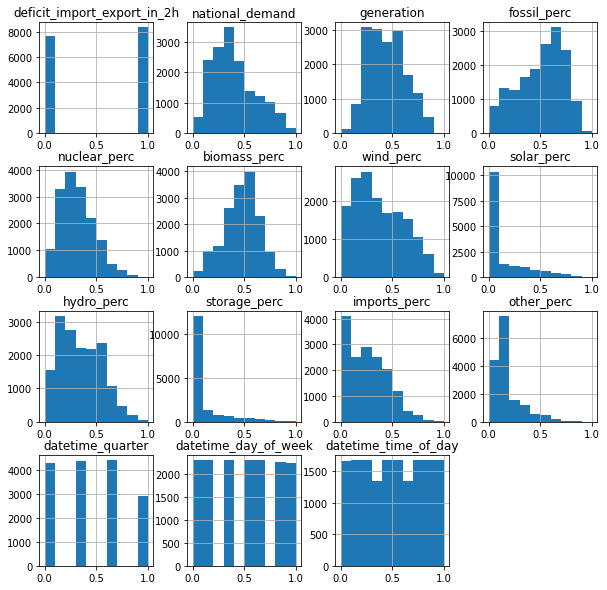

In [57]:
pd.DataFrame(
    MinMaxScaler().fit_transform(grid_subdata),
    columns=grid_subdata.columns,
    ).hist(figsize=(10,10))

# Prediction model

## Start of the data splitting

In [58]:
from sklearn.model_selection import train_test_split
X, y = grid_subdata.drop(['deficit_import_export_in_2h'], axis=1), grid_subdata['deficit_import_export_in_2h']
x_train, x_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=.2
)

print(f"train n = {len(x_train)}, test n = {len(x_test)}")

train n = 12815, test n = 3204


In [59]:
# Tree classifier model with an optimiser using grid search on the hyperparameters (like depth. estimators and criterion)
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

def simple_grid_search(
    x_train, y_train, x_test, y_test, feature_engineering_pipeline):
    '''
    simple helper function to grid search an
    ExtraTreesClassifier model and print out a classification report
    for the best model where best here is defined as having
    the best cross-validated accuracy on the training set
    '''
    params = {  # some simple parameters to grid search
        'max_depth': [10, None],
        'n_estimators': [10, 50, 100, 500],
        'criterion': ['gini', 'entropy']
    }
    base_model = ExtraTreesClassifier()
    model_grid_search = GridSearchCV(base_model, param_grid=params, cv=3)
    start_time = time.time()  # capture the start time
    # fit FE pipeline to training data and use it to transform test data
    if feature_engineering_pipeline:
        parsed_x_train = feature_engineering_pipeline.fit_transform(
            x_train, y_train)
        parsed_x_test = feature_engineering_pipeline.transform(x_test)
    else:
      parsed_x_train = x_train
      parsed_x_test = x_test
    parse_time = time.time()
    print(f"Parsing took {(parse_time - start_time):.2f} seconds")
    # Creates the model
    model_grid_search.fit(parsed_x_train, y_train)
    fit_time = time.time()
    print(f"Training took {(fit_time - start_time):.2f} seconds")
    best_model = model_grid_search.best_estimator_
    print(classification_report(
        y_true=y_test, y_pred=best_model.predict(parsed_x_test)))
    end_time = time.time()
    print(f"Overall took {(end_time - start_time):.2f} seconds")
    return best_model

Precision: True positives / predicted positives

Sensitivity: True positives / all positive cases

In [60]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

numerical_columns = [
    'national_demand',
    'generation',
    'fossil_perc',
    'nuclear_perc',
    'biomass_perc',
    'wind_perc',
    'solar_perc',
    'hydro_perc',
    'storage_perc',
    'imports_perc',
    'other_perc',
]

datetime_columns = [
    'datetime_quarter',
    'datetime_day_of_week',
    'datetime_time_of_day'
]

In [84]:
# Run the baseline
simple_grid_search(x_train, y_train, x_test, y_test, feature_engineering_pipeline= None)

Parsing took 0.00 seconds
Training took 71.21 seconds
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1537
           1       0.96      0.97      0.96      1667

    accuracy                           0.96      3204
   macro avg       0.96      0.96      0.96      3204
weighted avg       0.96      0.96      0.96      3204

Overall took 71.70 seconds


ExtraTreesClassifier(criterion='entropy', n_estimators=500)

In [85]:
from sklearn.impute import SimpleImputer
# Select only numerical descriptors
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df:
df[numerical_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=0)),
        ('scale', MinMaxScaler())
    ]
)

In [86]:
# Run the test with the engineered features
simple_grid_search(x_train, y_train, x_test, y_test, numerical_pipeline)

Parsing took 0.02 seconds
Training took 55.34 seconds
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1537
           1       0.93      0.95      0.94      1667

    accuracy                           0.94      3204
   macro avg       0.94      0.94      0.94      3204
weighted avg       0.94      0.94      0.94      3204

Overall took 55.45 seconds


ExtraTreesClassifier()

In [63]:
from sklearn.impute import SimpleImputer
# Select only numerical descriptors
numerical_pipeline = Pipeline(
    [
        ('select_numerical_features', FunctionTransformer(lambda df:
df[numerical_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=0)),
        ('scale', StandardScaler())
    ]
)


In [64]:
# This is a data-centric approach because you cannot change the model in this function (it's hard coded). All you can change is the data and the data pipeline
simple_grid_search(x_train, y_train, x_test, y_test, numerical_pipeline)

Parsing took 0.02 seconds
Training took 53.84 seconds
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1537
           1       0.94      0.95      0.94      1667

    accuracy                           0.94      3204
   macro avg       0.94      0.94      0.94      3204
weighted avg       0.94      0.94      0.94      3204

Overall took 53.95 seconds


ExtraTreesClassifier(criterion='entropy')

In [81]:
datetime_pipeline = Pipeline(
    [
        ('select_datetime_features', FunctionTransformer(lambda df:
df[datetime_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=0)),
        #('minmaxscale', MinMaxScaler())
    ]
)

In [83]:
simple_grid_search(x_train, y_train, x_test, y_test, datetime_pipeline)

Parsing took 0.04 seconds
Training took 47.10 seconds
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1537
           1       0.87      0.81      0.84      1667

    accuracy                           0.84      3204
   macro avg       0.84      0.84      0.84      3204
weighted avg       0.84      0.84      0.84      3204

Overall took 47.21 seconds


ExtraTreesClassifier(max_depth=10)

In [67]:
datetime_pipeline = Pipeline(
    [
        ('select_datetime_features', FunctionTransformer(lambda df:
df[datetime_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=0)),
        ('scale', StandardScaler()),
        ('minmaxscale', MinMaxScaler()),
    ]
)

In [68]:
simple_grid_search(x_train, y_train, x_test, y_test, numerical_pipeline)

Parsing took 0.02 seconds
Training took 58.44 seconds
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1537
           1       0.94      0.95      0.94      1667

    accuracy                           0.94      3204
   macro avg       0.94      0.94      0.94      3204
weighted avg       0.94      0.94      0.94      3204

Overall took 58.95 seconds


ExtraTreesClassifier(criterion='entropy', n_estimators=500)

In [69]:
# Select only datetime descriptors
datetime_pipeline = Pipeline(
    [
        ('select_datetime_features', FunctionTransformer(lambda df:
df[datetime_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=0)),
        ('scale', StandardScaler())
    ]
)

In [70]:
simple_grid_search(x_train, y_train, x_test, y_test, datetime_pipeline)

Parsing took 0.02 seconds
Training took 37.76 seconds
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1537
           1       0.87      0.81      0.84      1667

    accuracy                           0.84      3204
   macro avg       0.84      0.84      0.84      3204
weighted avg       0.84      0.84      0.84      3204

Overall took 38.10 seconds


ExtraTreesClassifier(criterion='entropy', max_depth=10, n_estimators=500)

In [71]:
# Select only datetime descriptors
datetime_pipeline = Pipeline(
    [
        ('select_datetime_features', FunctionTransformer(lambda df:
df[datetime_columns])),
        ('impute', SimpleImputer(strategy='constant', fill_value=0)),
        ('scale', StandardScaler()),
        ('ordinal_bins', KBinsDiscretizer(n_bins=6, encode='ordinal',strategy='kmeans'))
    ]
)

In [72]:
simple_grid_search(x_train, y_train, x_test, y_test, datetime_pipeline)

Parsing took 0.05 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:219: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


Training took 27.62 seconds
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1537
           1       0.87      0.81      0.84      1667

    accuracy                           0.84      3204
   macro avg       0.84      0.84      0.84      3204
weighted avg       0.84      0.84      0.84      3204

Overall took 27.64 seconds


ExtraTreesClassifier(max_depth=10, n_estimators=10)

In [73]:
simple_fe = FeatureUnion([
    ('datetime_pipeline', datetime_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

In [74]:
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.04 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:219: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


Training took 57.91 seconds
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1537
           1       0.96      0.97      0.96      1667

    accuracy                           0.96      3204
   macro avg       0.96      0.96      0.96      3204
weighted avg       0.96      0.96      0.96      3204

Overall took 58.40 seconds


In [75]:
%pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 4.9 MB/s 


In [76]:
from feature_engine.imputation import EndTailImputer
from sklearn.preprocessing import PowerTransformer
numerical_pipeline = Pipeline([
    ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
    ('Box–Cox', PowerTransformer(method='yeo-johnson', standardize=True)),
    ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))), # turn back into dataframe
    ('end_of_tail', EndTailImputer(imputation_method='gaussian'))
])

In [77]:
best_model = simple_grid_search(x_train, y_train, x_test, y_test, numerical_pipeline)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Parsing took 0.39 seconds
Training took 63.17 seconds
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      1537
           1       0.93      0.95      0.94      1667

    accuracy                           0.93      3204
   macro avg       0.94      0.93      0.93      3204
weighted avg       0.93      0.93      0.93      3204

Overall took 63.68 seconds


In [78]:
numerical_pipeline = Pipeline([
    ('select_numerical_features', FunctionTransformer(lambda df: df[numerical_columns])),
    ('Box–Cox', PowerTransformer(method='yeo-johnson', standardize=True)),
    ('turn_into_df', FunctionTransformer(lambda matrix: pd.DataFrame(matrix))), # turn back into dataframe
    ('end_of_tail', EndTailImputer(imputation_method='gaussian')),
    ('ordinal_bins', KBinsDiscretizer(n_bins=50, encode='ordinal',strategy='kmeans'))
])

In [79]:
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

Parsing took 0.10 seconds


/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:219: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  centers = km.fit(column[:, None]).cluster_centers_[:, 0]
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_discretization.py:230: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


Training took 66.76 seconds
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1537
           1       0.96      0.97      0.96      1667

    accuracy                           0.96      3204
   macro avg       0.96      0.96      0.96      3204
weighted avg       0.96      0.96      0.96      3204

Overall took 67.25 seconds


 Select the best model combinations:

In [80]:
simple_fe = FeatureUnion([
    ('risk_factors', risk_factor_pipeline),
    ('binary_pipeline', binary_pipeline),
    ('numerical_pipeline', numerical_pipeline)
])

NameError: ignored

In [ ]:
best_model = simple_grid_search(x_train, y_train, x_test, y_test, simple_fe)

In [ ]:
simple_fe.transformer_list